# Handle missing values in data

In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [2]:
df = pd.DataFrame(data={
    'feature_1' : [np.nan, 3, 6, 9, 12, 15, np.nan],
    'feature_2' : [100, np.nan, 200, 300, np.nan, np.nan, 600],
    'feature_3' : [1000, 500, 2000, 3000, 4000, 6000, 8000],
})

df

,feature_1,feature_2,feature_3
0,NaN,100.0,1000
1,3.0,NaN,500
2,6.0,200.0,2000
3,9.0,300.0,3000
4,12.0,NaN,4000
5,15.0,NaN,6000
6,NaN,600.0,8000


In [3]:
df.isnull() 

,feature_1,feature_2,feature_3
0,True,False,False
1,False,True,False
2,False,False,False
3,False,False,False
4,False,True,False
5,False,True,False
6,True,False,False


In [4]:
df.isnull().sum()

feature_1    2
feature_2    3
feature_3    0
dtype: int64

In [5]:
df.fillna(method='pad', limit=1)

,feature_1,feature_2,feature_3
0,NaN,100.0,1000
1,3.0,100.0,500
2,6.0,200.0,2000
3,9.0,300.0,3000
4,12.0,300.0,4000
5,15.0,NaN,6000
6,15.0,600.0,8000


In [6]:
df.fillna(method='pad', limit=2)

,feature_1,feature_2,feature_3
0,NaN,100.0,1000
1,3.0,100.0,500
2,6.0,200.0,2000
3,9.0,300.0,3000
4,12.0,300.0,4000
5,15.0,300.0,6000
6,15.0,600.0,8000


In [7]:
df.fillna(method = 'bfill')

,feature_1,feature_2,feature_3
0,3.0,100.0,1000
1,3.0,200.0,500
2,6.0,200.0,2000
3,9.0,300.0,3000
4,12.0,600.0,4000
5,15.0,600.0,6000
6,NaN,600.0,8000


In [8]:
df.fillna(method = 'ffill')

,feature_1,feature_2,feature_3
0,NaN,100.0,1000
1,3.0,100.0,500
2,6.0,200.0,2000
3,9.0,300.0,3000
4,12.0,300.0,4000
5,15.0,300.0,6000
6,15.0,600.0,8000


In [9]:
df.dropna(axis=0)

,feature_1,feature_2,feature_3
2,6.0,200.0,2000
3,9.0,300.0,3000


In [10]:
df.dropna(axis=1)

,feature_3
0,1000
1,500
2,2000
3,3000
4,4000
5,6000
6,8000


Only drop columns which have at least 90% non-NaNs

In [11]:
df.dropna(thresh=int(df.shape[0] * .9), axis=1)

,feature_3
0,1000
1,500
2,2000
3,3000
4,4000
5,6000
6,8000


In [12]:
df['feature_1'].fillna(df['feature_1'].mean())

0     9.0
1     3.0
2     6.0
3     9.0
4    12.0
5    15.0
6     9.0
Name: feature_1, dtype: float64

In [13]:
df['feature_2'].interpolate()

0    100.0
1    150.0
2    200.0
3    300.0
4    400.0
5    500.0
6    600.0
Name: feature_2, dtype: float64

In [14]:
df.replace(np.nan, 0)

,feature_1,feature_2,feature_3
0,0.0,100.0,1000
1,3.0,0.0,500
2,6.0,200.0,2000
3,9.0,300.0,3000
4,12.0,0.0,4000
5,15.0,0.0,6000
6,0.0,600.0,8000


# Handling outliers

In [15]:
mall_customers_info = pd.read_csv("data/mall_customers_data.csv")
mall_customers_info.head()

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [16]:
mall_customers_info.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual_Income             False
Spending Score (1-100)    False
dtype: bool

In [17]:
mall_customers_info.nunique()

CustomerID                200
Gender                      2
Age                        50
Annual_Income              67
Spending Score (1-100)     82
dtype: int64

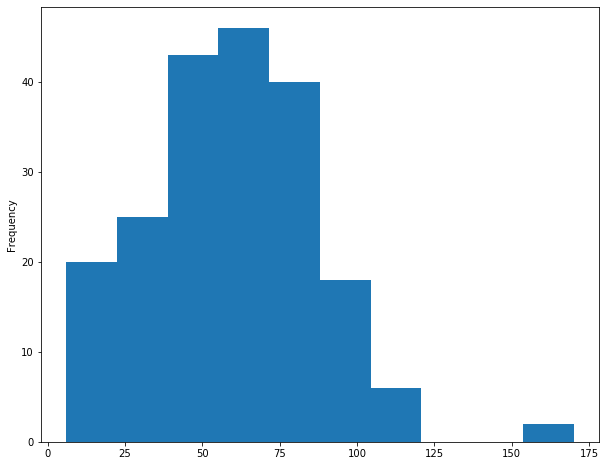

In [18]:
mall_customers_info['Annual_Income'].plot.hist(bins=10, figsize=(10, 8));

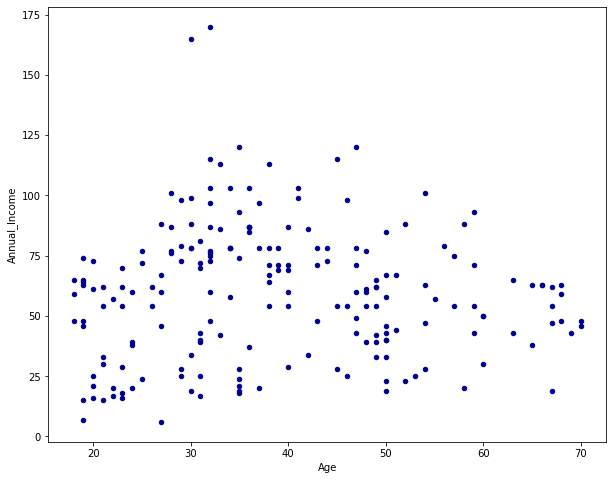

In [19]:
mall_customers_info.plot.scatter(x='Age',
                                y='Annual_Income',
                                c='DarkBlue',
                                figsize=(10, 8));

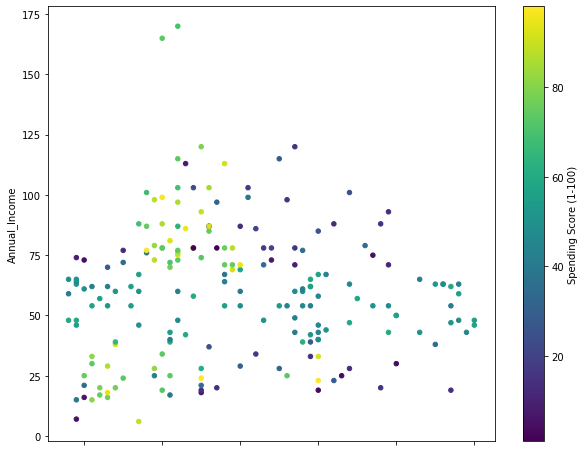

In [20]:
mall_customers_info.plot.scatter(x='Age',
                                 y='Annual_Income',
                                 c='Spending Score (1-100)',
                                 colormap='viridis',
                                 figsize=(10, 8));

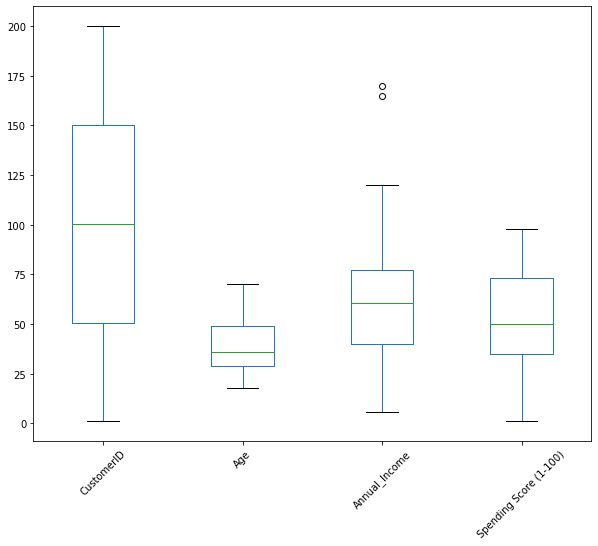

In [21]:
boxplot = mall_customers_info.boxplot(grid=False, rot=45, figsize=(10, 8));

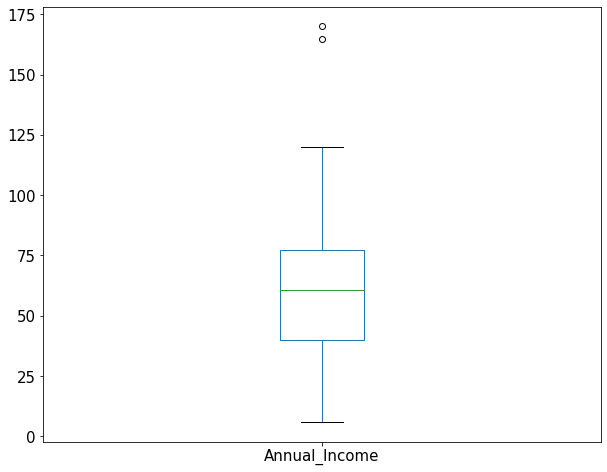

In [22]:
boxplot = mall_customers_info.boxplot(grid=False, fontsize=15, 
                                      column=['Annual_Income'], figsize=(10, 8));

In [23]:
mall_customers_info.loc[mall_customers_info['Annual_Income'] > 125]             

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100)
198,199,Male,32,170,70
199,200,Male,30,165,73


In [24]:
Q1 = mall_customers_info['Annual_Income'].quantile(0.25)
Q3 = mall_customers_info['Annual_Income'].quantile(0.75)

print(Q1, Q3)

40.0 77.25


In [25]:
IQR = Q3 - Q1
mall_customers_info['Annual_Income_Outlier'] = False
Q1 + 1.5 * IQR

95.875

In [26]:
for index, row in mall_customers_info.iterrows():
    
    if row['Annual_Income']  > (Q1 + 1.5 * IQR):
        mall_customers_info.at[index, 'Annual_Income_Outlier'] = True

In [27]:
mall_customers_info['Annual_Income_Outlier'].sum()

20

In [28]:
non_outliers = mall_customers_info.loc[mall_customers_info['Annual_Income_Outlier'] == False]
non_outliers.head()

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100),Annual_Income_Outlier
0,1,Male,19,15,39,False
1,2,Male,21,15,81,False
2,3,Female,20,16,6,False
3,4,Female,23,16,77,False
4,5,Female,31,17,40,False


In [29]:
mean = non_outliers['Annual_Income'].mean()
mean

54.05555555555556

In [30]:
for index, row in mall_customers_info.iterrows():
    
    if row['Annual_Income_Outlier']  == True:
        mall_customers_info.at[index, 'Annual_Income'] = mean

In [31]:
mall_customers_info.sample(5)

,CustomerID,Gender,Age,Annual_Income,Spending Score (1-100),Annual_Income_Outlier
105,106,Female,21,62,42,False
191,192,Female,32,54,69,True
108,109,Male,68,63,43,False
88,89,Female,34,58,60,False
126,127,Male,43,71,35,False


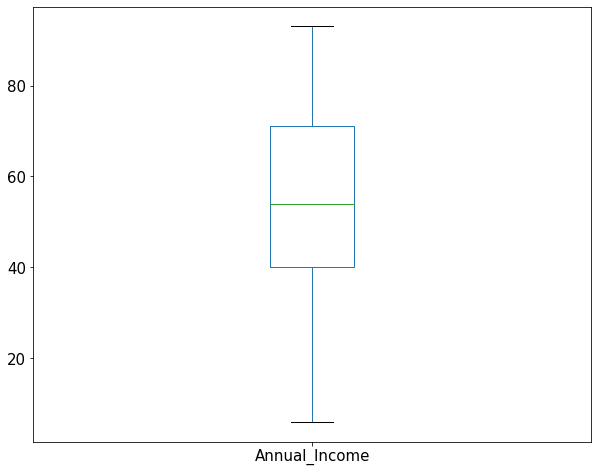

In [32]:
boxplot = mall_customers_info.boxplot(grid=False, fontsize=15, 
                                      column=['Annual_Income'], figsize=(10, 8));

# Feature selection using MissingValueRatio

We start off by handling missing data using various techniques. We then eliminate some features based on a threshold of missing data

In [33]:
melb_data = pd.read_csv('data/melb_data.csv')
melb_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [34]:
empty_col_cells = melb_data.isnull().sum().sort_values(ascending=False)
empty_col_cells.head()

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Propertycount       0
dtype: int64

In [35]:
(melb_data.isnull().sum() / melb_data.shape[0]).sort_values(ascending = False)

BuildingArea     0.474963
YearBuilt        0.395803
CouncilArea      0.100810
Car              0.004566
Propertycount    0.000000
Date             0.000000
Address          0.000000
Rooms            0.000000
Type             0.000000
Price            0.000000
Method           0.000000
SellerG          0.000000
Bedroom2         0.000000
Distance         0.000000
Postcode         0.000000
Regionname       0.000000
Bathroom         0.000000
Landsize         0.000000
Lattitude        0.000000
Longtitude       0.000000
Suburb           0.000000
dtype: float64

In [36]:
melb_data[['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car']].head()

,BuildingArea,YearBuilt,CouncilArea,Car
0,NaN,NaN,Yarra,1.0
1,79.0,1900.0,Yarra,0.0
2,150.0,1900.0,Yarra,0.0
3,NaN,NaN,Yarra,1.0
4,142.0,2014.0,Yarra,2.0


In [37]:
melb_data[['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car']].isnull().sum()

BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
Car               62
dtype: int64

In [38]:
melb_data[['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car']].describe()

,BuildingArea,YearBuilt,Car
count,7130.000000,8205.000000,13518.000000
mean,151.967650,1964.684217,1.610075
std,541.014538,37.273762,0.962634
min,0.000000,1196.000000,0.000000
25%,93.000000,1940.000000,1.000000
50%,126.000000,1970.000000,2.000000
75%,174.000000,1999.000000,2.000000
max,44515.000000,2018.000000,10.000000


In [39]:
melb_data['Car'] = melb_data['Car'].fillna(melb_data['Car'].median())
melb_data[['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car']].describe()

,BuildingArea,YearBuilt,Car
count,7130.000000,8205.000000,13580.000000
mean,151.967650,1964.684217,1.611856
std,541.014538,37.273762,0.960793
min,0.000000,1196.000000,0.000000
25%,93.000000,1940.000000,1.000000
50%,126.000000,1970.000000,2.000000
75%,174.000000,1999.000000,2.000000
max,44515.000000,2018.000000,10.000000


In [40]:
melb_data[['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car']].isnull().sum()

BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
Car                0
dtype: int64

In [41]:
melb_data[['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car']].isnull().sum()

BuildingArea    6450
YearBuilt       5375
CouncilArea     1369
Car                0
dtype: int64

In [42]:
melb_data[['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car']].tail()

,BuildingArea,YearBuilt,CouncilArea,Car
13575,NaN,1981.0,NaN,2.0
13576,133.0,1995.0,NaN,2.0
13577,NaN,1997.0,NaN,4.0
13578,157.0,1920.0,NaN,5.0
13579,112.0,1920.0,NaN,1.0


In [43]:
melb_data['CouncilArea'].mode()

0    Moreland
dtype: object

In [44]:
melb_data['CouncilArea'] = melb_data['CouncilArea']\
                            .fillna(melb_data['CouncilArea'].mode()[0])
melb_data[['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car']].tail()

,BuildingArea,YearBuilt,CouncilArea,Car
13575,NaN,1981.0,Moreland,2.0
13576,133.0,1995.0,Moreland,2.0
13577,NaN,1997.0,Moreland,4.0
13578,157.0,1920.0,Moreland,5.0
13579,112.0,1920.0,Moreland,1.0


In [45]:
melb_data[['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car']].isnull().sum()

BuildingArea    6450
YearBuilt       5375
CouncilArea        0
Car                0
dtype: int64

# Computing and visualizing feature correlations

In [46]:
melb_data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.94,0.96,1.00,2.00,3.0,3.00,10.00
Price,13580.0,1075684.08,639310.72,85000.00,650000.00,903000.0,1330000.00,9000000.00
Distance,13580.0,10.14,5.87,0.00,6.10,9.2,13.00,48.10
Postcode,13580.0,3105.30,90.68,3000.00,3044.00,3084.0,3148.00,3977.00
Bedroom2,13580.0,2.91,0.97,0.00,2.00,3.0,3.00,20.00
Bathroom,13580.0,1.53,0.69,0.00,1.00,1.0,2.00,8.00
Car,13580.0,1.61,0.96,0.00,1.00,2.0,2.00,10.00
Landsize,13580.0,558.42,3990.67,0.00,177.00,440.0,651.00,433014.00
BuildingArea,7130.0,151.97,541.01,0.00,93.00,126.0,174.00,44515.00
YearBuilt,8205.0,1964.68,37.27,1196.00,1940.00,1970.0,1999.00,2018.00


In [47]:
py_num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']  
numerical_columns = list(melb_data.select_dtypes(include=py_num_types).columns)
numerical_columns

['Rooms',
 'Price',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount']

In [48]:
clean_data_numeric = melb_data[numerical_columns]
clean_data_numeric.sample(10)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
4305,3,710000.0,11.2,3042.0,3.0,2.0,1.0,317.0,140.0,1950.0,-37.74490,144.88690,2291.0
4636,3,790000.0,9.9,3044.0,3.0,3.0,1.0,291.0,175.0,2009.0,-37.72710,144.92610,7485.0
4916,3,1080000.0,8.8,3072.0,3.0,2.0,1.0,369.0,NaN,NaN,-37.73890,144.98210,14577.0
9778,3,990000.0,4.3,3032.0,3.0,1.0,0.0,196.0,102.0,1900.0,-37.77552,144.92022,6567.0
8160,2,680000.0,5.5,3070.0,2.0,2.0,1.0,1106.0,70.0,2009.0,-37.76790,144.99940,11364.0
8849,3,967000.0,3.4,3031.0,3.0,2.0,2.0,0.0,120.0,1999.0,-37.79482,144.92192,5263.0
10876,3,1635000.0,3.0,3067.0,3.0,1.0,0.0,142.0,130.0,1880.0,-37.80359,144.99538,4019.0
1334,3,1815000.0,5.2,3056.0,3.0,1.0,3.0,612.0,NaN,NaN,-37.77300,144.95200,11918.0
10325,2,697000.0,5.3,3122.0,2.0,1.0,1.0,0.0,NaN,NaN,-37.82887,145.03676,11308.0
9003,3,2120000.0,3.0,3206.0,3.0,1.0,2.0,225.0,NaN,NaN,-37.84396,144.95659,3280.0


In [49]:
clean_data_numeric = clean_data_numeric.drop(['Lattitude', 
                                              'Longtitude', 
                                              'Postcode' ], axis=1)

In [50]:
clean_data_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 10 columns):
Rooms            13580 non-null int64
Price            13580 non-null float64
Distance         13580 non-null float64
Bedroom2         13580 non-null float64
Bathroom         13580 non-null float64
Car              13580 non-null float64
Landsize         13580 non-null float64
BuildingArea     7130 non-null float64
YearBuilt        8205 non-null float64
Propertycount    13580 non-null float64
dtypes: float64(9), int64(1)
memory usage: 1.0 MB


In [51]:
pearson_corr = clean_data_numeric.corr(method='pearson')
pearson_corr

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
Rooms,1.000000,0.496634,0.294203,0.944190,0.592934,0.406935,0.025678,0.124127,-0.065413,-0.081530
Price,0.496634,1.000000,-0.162522,0.475951,0.467038,0.239109,0.037507,0.090981,-0.323617,-0.042153
Distance,0.294203,-0.162522,1.000000,0.295927,0.127155,0.260596,0.025004,0.099481,0.246379,-0.054910
Bedroom2,0.944190,0.475951,0.295927,1.000000,0.584685,0.403867,0.025646,0.122319,-0.053319,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.584685,1.000000,0.321014,0.037130,0.111933,0.152702,-0.052201
Car,0.406935,0.239109,0.260596,0.403867,0.321014,1.000000,0.026780,0.095945,0.101391,-0.024344
Landsize,0.025678,0.037507,0.025004,0.025646,0.037130,0.026780,1.000000,0.500485,0.036451,-0.006854
BuildingArea,0.124127,0.090981,0.099481,0.122319,0.111933,0.095945,0.500485,1.000000,0.019665,-0.028840
YearBuilt,-0.065413,-0.323617,0.246379,-0.053319,0.152702,0.101391,0.036451,0.019665,1.000000,0.006361
Propertycount,-0.081530,-0.042153,-0.054910,-0.081350,-0.052201,-0.024344,-0.006854,-0.028840,0.006361,1.000000


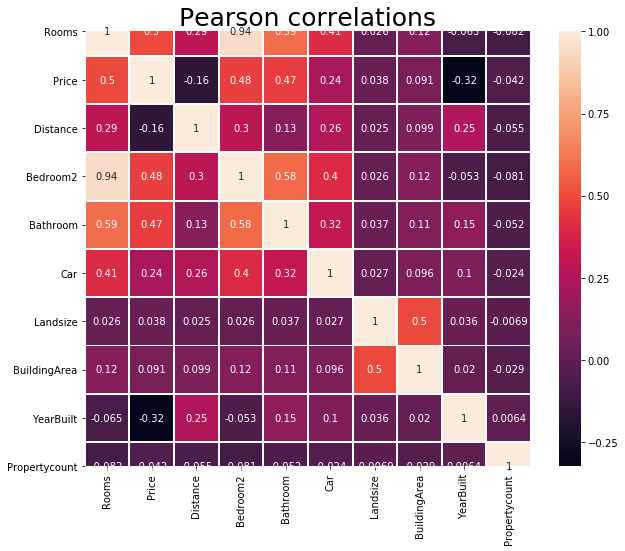

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 8))

sns.heatmap(pearson_corr, 
            linewidth=1, 
            annot=True, 
            annot_kws={'size' : 10} )

plt.title('Pearson correlations', fontsize=25)
plt.show()

In [54]:
spearman_corr = clean_data_numeric.corr(method='spearman')
spearman_corr

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
Rooms,1.000000,0.539886,0.351416,0.959668,0.586860,0.473515,0.485742,0.775193,-0.072058,-0.077651
Price,0.539886,1.000000,-0.129990,0.524029,0.427199,0.289197,0.327200,0.631425,-0.368080,-0.011409
Distance,0.351416,-0.129990,1.000000,0.358071,0.156650,0.342227,0.417379,0.287116,0.228634,-0.141644
Bedroom2,0.959668,0.524029,0.358071,1.000000,0.580364,0.474682,0.479792,0.761968,-0.058499,-0.076816
Bathroom,0.586860,0.427199,0.156650,0.580364,1.000000,0.369977,0.212134,0.650893,0.202215,-0.035286
Car,0.473515,0.289197,0.342227,0.474682,0.369977,1.000000,0.404978,0.470518,0.102895,-0.043038
Landsize,0.485742,0.327200,0.417379,0.479792,0.212134,0.404978,1.000000,0.470785,-0.128734,-0.074200
BuildingArea,0.775193,0.631425,0.287116,0.761968,0.650893,0.470518,0.470785,1.000000,0.003002,-0.081563
YearBuilt,-0.072058,-0.368080,0.228634,-0.058499,0.202215,0.102895,-0.128734,0.003002,1.000000,-0.005500
Propertycount,-0.077651,-0.011409,-0.141644,-0.076816,-0.035286,-0.043038,-0.074200,-0.081563,-0.005500,1.000000


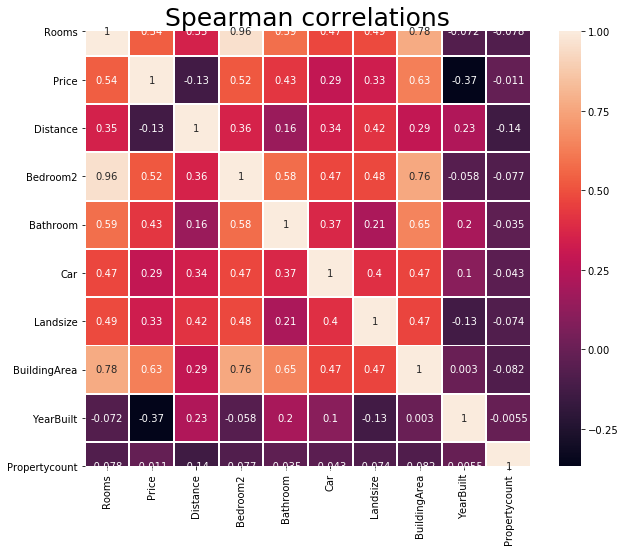

In [55]:
plt.figure(figsize = (10, 8))

sns.heatmap(spearman_corr, 
            linewidth=1, 
            annot=True, 
            annot_kws={'size' : 10} )

plt.title('Spearman correlations', fontsize=25)
plt.show()

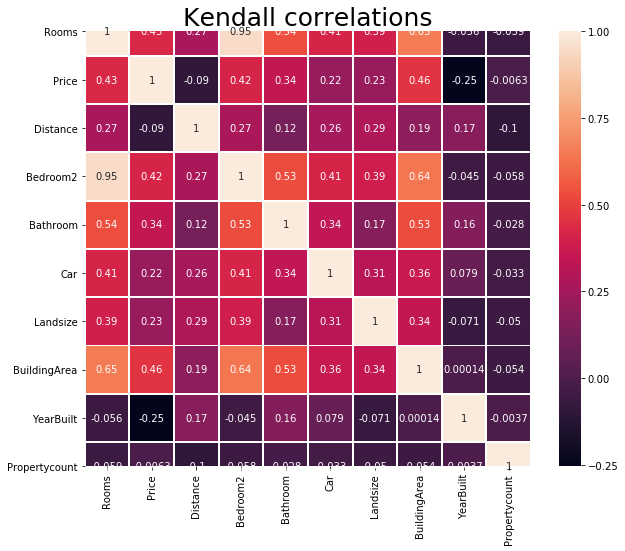

In [56]:
kendall_corr = clean_data_numeric.corr(method='kendall')

plt.figure(figsize = (10, 8))

sns.heatmap(kendall_corr, 
            linewidth=1, 
            annot=True, 
            annot_kws={'size' : 10} )

plt.title('Kendall correlations', fontsize=25)

plt.show()

# Performing univariate selection backward elimination and recursive feature elimination

In [57]:
house_data = pd.read_csv('data/HousingData.csv')
house_data.shape

(506, 12)

In [58]:
house_data.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4,430,16.9,22.6
41,0.12744,0.0,6.91,0.0,0.448,6.770,2.9,5.7209,3,233,17.9,26.6
445,10.67180,0.0,18.10,0.0,0.740,6.459,94.8,1.9879,24,666,20.2,11.8
77,0.08707,0.0,12.83,0.0,0.437,6.140,45.8,4.0905,5,398,18.7,20.8
230,0.53700,0.0,6.20,0.0,0.504,5.981,68.1,3.6715,8,307,17.4,24.3
47,0.22927,0.0,NaN,0.0,0.448,6.030,85.5,5.6894,3,233,17.9,16.6
301,0.03537,NaN,6.09,0.0,0.433,6.590,40.4,5.4917,7,329,16.1,22.0
257,0.61154,20.0,3.97,0.0,0.647,8.704,86.9,1.8010,5,264,13.0,50.0
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4,280,17.0,24.5
205,0.13642,NaN,10.59,0.0,0.489,5.891,22.3,3.9454,4,277,18.6,22.6


In [59]:
col_names = ['CrimeRate', 'ZonedRatio', 'IndusRatio', 
             'AlongRiver', 'NO2Level', 'RoomsPerHouse', 
             'OldHomeRatio', 'DisFromCenter', 'RoadAccessIndex', 
             'PropTaxRate', 'PupilTeacherRatio', 'MedianHomeValue']
house_data.columns = col_names
house_data.sample(5)

,CrimeRate,ZonedRatio,IndusRatio,AlongRiver,NO2Level,RoomsPerHouse,OldHomeRatio,DisFromCenter,RoadAccessIndex,PropTaxRate,PupilTeacherRatio,MedianHomeValue
116,0.13158,0.0,10.01,0.0,0.5470,6.176,72.5,2.7301,6,432,17.8,21.2
102,0.22876,0.0,8.56,0.0,0.5200,6.405,85.4,2.7147,5,384,20.9,18.6
406,20.71620,0.0,NaN,0.0,0.6590,4.138,100.0,1.1781,24,666,20.2,11.9
78,0.05646,0.0,12.83,0.0,0.4370,6.232,53.7,5.0141,5,398,18.7,21.2
282,0.06129,20.0,3.33,1.0,0.4429,7.645,49.7,5.2119,5,216,14.9,46.0


In [60]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
CrimeRate            486 non-null float64
ZonedRatio           486 non-null float64
IndusRatio           486 non-null float64
AlongRiver           486 non-null float64
NO2Level             506 non-null float64
RoomsPerHouse        506 non-null float64
OldHomeRatio         486 non-null float64
DisFromCenter        506 non-null float64
RoadAccessIndex      506 non-null int64
PropTaxRate          506 non-null int64
PupilTeacherRatio    506 non-null float64
MedianHomeValue      506 non-null float64
dtypes: float64(10), int64(2)
memory usage: 47.6 KB


In [61]:
house_data = house_data.replace('NA', np.nan)
house_data.isnull().sum().sort_values(ascending=False)

OldHomeRatio         20
AlongRiver           20
IndusRatio           20
ZonedRatio           20
CrimeRate            20
MedianHomeValue       0
PupilTeacherRatio     0
PropTaxRate           0
RoadAccessIndex       0
DisFromCenter         0
RoomsPerHouse         0
NO2Level              0
dtype: int64

In [62]:
data = house_data.fillna(house_data.mean())
data.head()

,CrimeRate,ZonedRatio,IndusRatio,AlongRiver,NO2Level,RoomsPerHouse,OldHomeRatio,DisFromCenter,RoadAccessIndex,PropTaxRate,PupilTeacherRatio,MedianHomeValue
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,36.2


In [63]:
data.isnull().sum()

CrimeRate            0
ZonedRatio           0
IndusRatio           0
AlongRiver           0
NO2Level             0
RoomsPerHouse        0
OldHomeRatio         0
DisFromCenter        0
RoadAccessIndex      0
PropTaxRate          0
PupilTeacherRatio    0
MedianHomeValue      0
dtype: int64

In [64]:
data.describe()

,CrimeRate,ZonedRatio,IndusRatio,AlongRiver,NO2Level,RoomsPerHouse,OldHomeRatio,DisFromCenter,RoadAccessIndex,PropTaxRate,PupilTeacherRatio,MedianHomeValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,50.000000


In [65]:
data.shape

(506, 12)

In [66]:
target = data['MedianHomeValue']
features = data.drop('MedianHomeValue', axis=1)

In [67]:
features.shape, target.shape

((506, 11), (506,))

In [68]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

select_univariate = SelectKBest(f_regression, k=5).fit(features, target)
feature_mask = select_univariate.get_support()
feature_mask

array([False, False,  True, False,  True,  True, False, False, False,
        True,  True])

In [69]:
features.columns[feature_mask]

Index(['IndusRatio', 'NO2Level', 'RoomsPerHouse', 'PropTaxRate',
       'PupilTeacherRatio'],
      dtype='object')

In [70]:
pd.DataFrame({'FeatureName': features.columns, 
              'Score': select_univariate.scores_}).sort_values(by='Score', 
                                                               ascending=False)

,FeatureName,Score
5,RoomsPerHouse,471.846740
10,PupilTeacherRatio,175.105543
2,IndusRatio,149.792187
9,PropTaxRate,141.761357
4,NO2Level,112.591480
8,RoadAccessIndex,85.914278
6,OldHomeRatio,85.177279
0,CrimeRate,84.901074
1,ZonedRatio,77.928600
7,DisFromCenter,33.579570


In [71]:
uni_df = pd.DataFrame({'Univariate Method': features.columns[feature_mask]})
uni_df

,Univariate Method
0,IndusRatio
1,NO2Level
2,RoomsPerHouse
3,PropTaxRate
4,PupilTeacherRatio


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

linear_regression = LinearRegression()
rfe = RFE(estimator = linear_regression, 
          n_features_to_select = 5, 
          step = 1)
rfe.fit(features,target)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=5, step=1, verbose=0)

In [73]:
rfe_features = features.columns[rfe.support_]
rfe_features

Index(['AlongRiver', 'NO2Level', 'RoomsPerHouse', 'DisFromCenter',
       'PupilTeacherRatio'],
      dtype='object')

In [74]:
pd.DataFrame({'FeatureName': features.columns, 
              'Rank': rfe.ranking_}).sort_values(by='Rank')

,FeatureName,Rank
3,AlongRiver,1
4,NO2Level,1
5,RoomsPerHouse,1
7,DisFromCenter,1
10,PupilTeacherRatio,1
2,IndusRatio,2
0,CrimeRate,3
8,RoadAccessIndex,4
6,OldHomeRatio,5
1,ZonedRatio,6


In [75]:
rfe_df = pd.DataFrame({'RFE Method': rfe_features})
rfe_df

,RFE Method
0,AlongRiver
1,NO2Level
2,RoomsPerHouse
3,DisFromCenter
4,PupilTeacherRatio


## Regularization technique for feature selection 

In [76]:
from sklearn.linear_model import  Lasso
lasso = Lasso(alpha=1.0)
lasso.fit(features, target)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
lasso_coef = pd.DataFrame({'Feature': features.columns, 
                           'LassoCoef': lasso.coef_}).sort_values(by = 'LassoCoef',
                                                                  ascending =False)
lasso_coef

,Feature,LassoCoef
5,RoomsPerHouse,4.385491
8,RoadAccessIndex,0.195388
1,ZonedRatio,0.042629
3,AlongRiver,0.000000
4,NO2Level,-0.000000
9,PropTaxRate,-0.016605
6,OldHomeRatio,-0.046299
2,IndusRatio,-0.087830
0,CrimeRate,-0.160247
7,DisFromCenter,-0.636740


In [78]:
lasso_coef['LassoCoef'] = abs(lasso_coef['LassoCoef'])
lasso_coef.sort_values(by='LassoCoef', ascending=False)

,Feature,LassoCoef
5,RoomsPerHouse,4.385491
10,PupilTeacherRatio,0.737281
7,DisFromCenter,0.636740
8,RoadAccessIndex,0.195388
0,CrimeRate,0.160247
2,IndusRatio,0.087830
6,OldHomeRatio,0.046299
1,ZonedRatio,0.042629
9,PropTaxRate,0.016605
3,AlongRiver,0.000000


In [79]:
lasso_df = lasso_coef.sort_values(by='LassoCoef', ascending=False).head(5)
lasso_df = pd.DataFrame({'Lasso Method': lasso_df['Feature'].values})
lasso_df

,Lasso Method
0,RoomsPerHouse
1,PupilTeacherRatio
2,DisFromCenter
3,RoadAccessIndex
4,CrimeRate


In [80]:
comp_selected_col_df = [uni_df, 
                        rfe_df, 
                        back_df, 
                        forw_df, 
                        lasso_df]

final_df = pd.concat(comp_selected_col_df, axis=1)
final_df

NameError: name 'back_df' is not defined